<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_python/da14_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movielens 데이터 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비

In [2]:
# 데이터 파일들의 경로
movies_file = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/movielens/movies.dat'
ratings_file = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/movielens/ratings.dat'
users_file = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/movielens/users.dat'

In [3]:
# 데이터프레임 컬럼 이름들
movies_col = ['movie_id', 'title', 'genres']  # movies.dat 파일에서 사용할 컬럼 이름들.
ratings_col = ['user_id', 'movie_id', 'rating', 'timestamp']  # ratins.dat 파일의 컬럼 이름들.
users_col = ['user_id', 'gender', 'age', 'occupation', 'zip_code']  # users.dat 파일의 컬럼 이름들.

# 데이터프레임 생성

*   movies
*   ratings
*   users
*   데이터프레임 합치기(merge)
    *   ratings와 movies를 merge
    *   위의 결과와 users를 merge


## movies DataFrame

In [4]:
movies = pd.read_csv(movies_file, names=movies_col, sep='::', engine='python')

In [5]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


## ratings DataFrame

In [7]:
ratings = pd.read_csv(ratings_file, names=ratings_col, sep='::', engine='python')

In [8]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [10]:
# timestamp(정수) --> 날짜 타입(datetime) 변환
pd.to_datetime(ratings.timestamp, unit='s')  # unit: 's', 'ms', 'ns'

,timestamp
0,2000-12-31 22:12:40
1,2000-12-31 22:35:09
2,2000-12-31 22:32:48
3,2000-12-31 22:04:35
4,2001-01-06 23:38:11
...,...
1000204,2000-04-26 02:35:41
1000205,2000-04-25 23:21:27
1000206,2000-04-25 23:19:06
1000207,2000-04-26 02:20:48


## users DataFrame

In [11]:
users = pd.read_csv(users_file, names=users_col, sep='::', engine='python')

In [12]:
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


## DataFrame merge(조인)

In [14]:
# ratings와 movies를 merge(inner join)
df = pd.merge(left=ratings, right=movies)

In [15]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1000209 non-null  int64 
 1   movie_id   1000209 non-null  int64 
 2   rating     1000209 non-null  int64 
 3   timestamp  1000209 non-null  int64 
 4   title      1000209 non-null  object
 5   genres     1000209 non-null  object
dtypes: int64(4), object(2)
memory usage: 45.8+ MB


In [17]:
# df와 users를 merge(inner join)
df = pd.merge(left=df, right=users)

In [18]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   title       1000209 non-null  object
 5   genres      1000209 non-null  object
 6   gender      1000209 non-null  object
 7   age         1000209 non-null  int64 
 8   occupation  1000209 non-null  int64 
 9   zip_code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


# 데이터 탐색

*   카테고리 변수 탐색
    *   성별 빈도수
    *   연령대 빈도수
    *   직업군 빈도수
    *   별점 빈도수


## 성별 분석

In [20]:
df.gender.value_counts()

,count
gender,
M,753769
F,246440


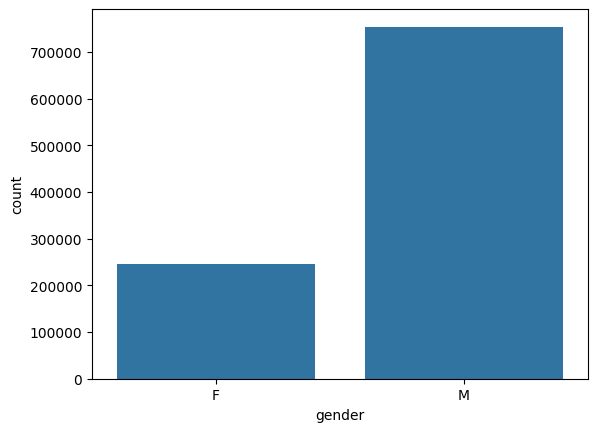

In [21]:
sns.countplot(data=df, x='gender')
plt.show()

## 연령대 분석

In [22]:
df.age.value_counts()

,count
age,
25,395556
35,199003
18,183536
45,83633
50,72490
56,38780
1,27211


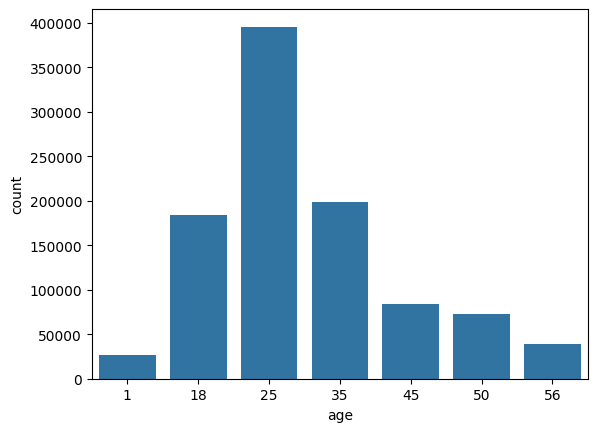

In [23]:
sns.countplot(data=df, x='age')
plt.show()

## 직업군 분석

In [24]:
df.occupation.value_counts()

,count
occupation,
4,131032
0,130499
7,105425
1,85351
17,72816
20,60397
12,57214
2,50068
14,49109


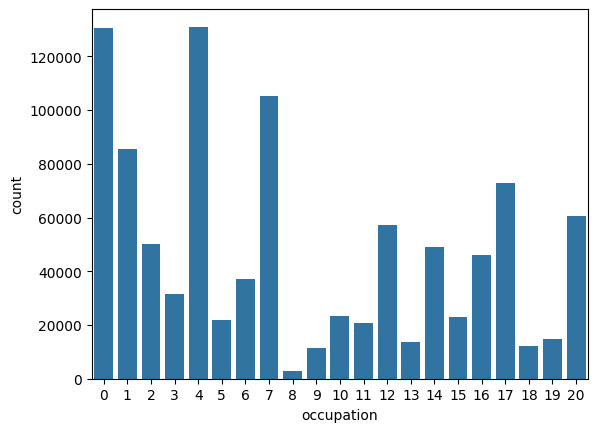

In [25]:
sns.countplot(data=df, x='occupation')
plt.show()

## 별점 분석

In [26]:
df.rating.value_counts()

,count
rating,
4,348971
3,261197
5,226310
2,107557
1,56174


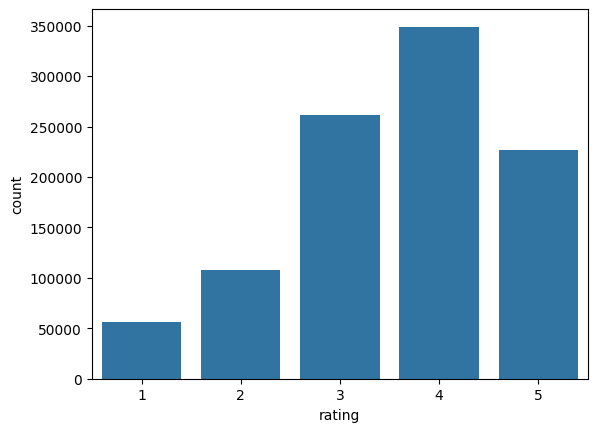

In [27]:
sns.countplot(data=df, x='rating')
plt.show()

# 데이터 분석

##  별점 평균 상위 10개/하위 10개 영화 제목

영화 제목별 별점 평균을 계산하고 정렬

In [29]:
by_title = df.groupby(by=['title']).rating.mean()

In [30]:
by_title

,rating
title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
...,...
"Zed & Two Noughts, A (1985)",3.413793
Zero Effect (1998),3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000


In [33]:
by_title_sorted = by_title.sort_values(ascending=False)

In [34]:
by_title_sorted.head(n=10)

,rating
title,
Lured (1947),5.0
Ulysses (Ulisse) (1954),5.0
"Baby, The (1973)",5.0
Follow the Bitch (1998),5.0
Schlafes Bruder (Brother of Sleep) (1995),5.0
Bittersweet Motel (2000),5.0
Song of Freedom (1936),5.0
"Gate of Heavenly Peace, The (1995)",5.0
One Little Indian (1973),5.0


In [35]:
by_title_sorted.tail(n=10)

,rating
title,
Sleepover (1995),1.0
"Loves of Carmen, The (1948)",1.0
Santa with Muscles (1996),1.0
"McCullochs, The (1975)",1.0
"Silence of the Palace, The (Saimt el Qusur) (1994)",1.0
Terror in a Texas Town (1958),1.0
White Boys (1999),1.0
Mutters Courage (1995),1.0
Shadows (Cienie) (1988),1.0


In [36]:
df[df.title == 'Lured (1947)']

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
879590,5313,3656,5,960920392,Lured (1947),Crime,M,56,0,55406


In [37]:
df[df.title == 'Wirey Spindell (1999)']

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
201369,1242,3228,1,987709390,Wirey Spindell (1999),Comedy,F,35,0,10014
752758,4486,3228,1,965013093,Wirey Spindell (1999),Comedy,M,35,8,98674


별점 리뷰 건수가 1~2개 밖에 없는 영화들의 별점 평균은 큰 의미가 없음. 일정 개수 이상의 별점 리뷰가 있는 영화들을 선택해서 별점 평균을 분석하는 것이 의미가 있음.

In [38]:
title_count = df.title.value_counts()  # 영화 제목 빈도수

In [39]:
title_count

,count
title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672
...,...
Aiqing wansui (1994),1
Broken Vessels (1998),1
White Boys (1999),1


In [40]:
title_count.head(n=15)

,count
title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672
Saving Private Ryan (1998),2653
Terminator 2: Judgment Day (1991),2649
"Matrix, The (1999)",2590
Back to the Future (1985),2583


In [41]:
title_count.describe()  # 영화 제목 빈도수의 기술 통계량

,count
count,3706.000000
mean,269.889099
std,384.047838
min,1.000000
25%,33.000000
50%,123.500000
75%,350.000000
max,3428.000000


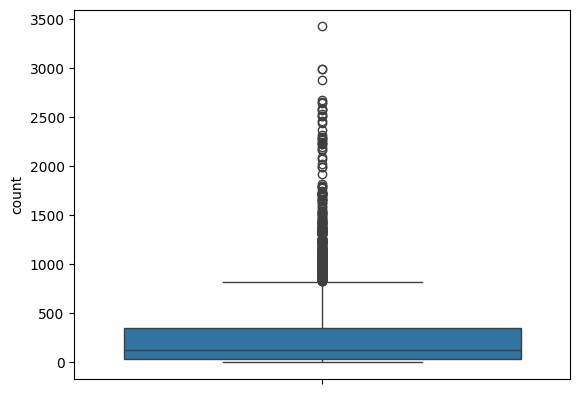

In [42]:
sns.boxplot(data=title_count)
plt.show()

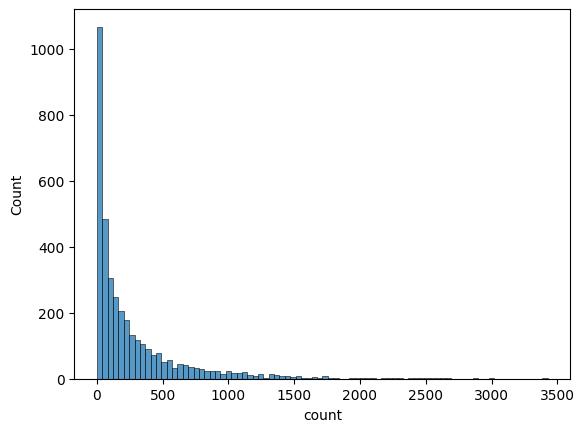

In [43]:
sns.histplot(data=title_count)
plt.show()

## 별점 리뷰 횟수가 120회 이상인 영화들을 선택해서 분석

In [50]:
# 별점 리뷰 횟수가 120회 이상인 영화 제목들
indexer = title_count[title_count >= 120].index
indexer

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Harriet the Spy (1996)', 'Dudley Do-Right (1999)',
       'Paris, Texas (1984)', 'Extreme Measures (1996)',
       'My Fellow Americans (1996)', 'Blue Hawaii (1961)', 'Backbeat (1993)',
       'Kazaam (1996)', 'Communion (1989)', 'Bed of Roses (1996)'],
      dtype='object', name='title', length=1879)

In [52]:
by_title.loc[indexer]

,rating
title,
American Beauty (1999),4.317386
Star Wars: Episode IV - A New Hope (1977),4.453694
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977
Star Wars: Episode VI - Return of the Jedi (1983),4.022893
Jurassic Park (1993),3.763847
...,...
Blue Hawaii (1961),2.826446
Backbeat (1993),3.525000
Kazaam (1996),1.466667


In [53]:
# 별점 리뷰 횟수가 120회 이상인 영화들의 별점 평균을 내림차순 정렬
by_title_sorted = by_title.loc[indexer].sort_values(ascending=False)

In [54]:
by_title_sorted.head(n=10)

,rating
title,
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.560510
"Shawshank Redemption, The (1994)",4.554558
"Godfather, The (1972)",4.524966
"Close Shave, A (1995)",4.520548
"Usual Suspects, The (1995)",4.517106
Schindler's List (1993),4.510417
"Wrong Trousers, The (1993)",4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.491489
Raiders of the Lost Ark (1981),4.477725


In [55]:
by_title_sorted.tail(n=10)

,rating
title,
Iron Eagle II (1988),1.864865
Jaws 3-D (1983),1.852381
"Flintstones in Viva Rock Vegas, The (2000)",1.804688
Stop! Or My Mom Will Shoot (1992),1.782123
Police Academy 5: Assignment: Miami Beach (1988),1.766667
Baby Geniuses (1999),1.701220
Police Academy 6: City Under Siege (1989),1.657718
Aces: Iron Eagle III (1992),1.640000
Battlefield Earth (2000),1.611111


## 성별에 따른 영화 선호도

*   별점 리뷰 횟수가 120번 이상인 영화들 선택.
*   제목별 성별 별점 평균 상위/하위 10개.

In [60]:
df_reduced = df[df.title.isin(indexer)]
df_reduced

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,M,25,6,11106
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War,M,25,6,11106
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6,11106
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama,M,25,6,11106


In [61]:
by_title_gender = df_reduced.pivot_table(values='rating', index='title', columns='gender')
by_title_gender

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


### 여성 별점 평균 상위/하위 10개 영화

In [62]:
# 여성 별점 평균 상위 10개 영화
by_title_gender.sort_values(by='F', ascending=False).head(n=10)

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
"General, The (1927)",4.575758,4.329480
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255


In [63]:
# 여성 별점 평균 하위 10개 영화
by_title_gender.sort_values(by='F', ascending=False).tail(n=10)

gender,F,M
title,,
Problem Child (1990),1.823529,1.952381
Stop! Or My Mom Will Shoot (1992),1.794872,1.778571
Friday the 13th Part 3: 3D (1982),1.758621,2.017647
Showgirls (1995),1.709091,2.166667
Friday the 13th: The Final Chapter (1984),1.636364,2.258503
Police Academy 6: City Under Siege (1989),1.625000,1.664000
Barb Wire (1996),1.585366,2.100386
Battlefield Earth (2000),1.574468,1.616949
Kazaam (1996),1.444444,1.470588


### 남성 별점 평균 상위/하위 10개 영화

In [64]:
# 남성 별점 평균 상위 10개 영화
by_title_gender.sort_values(by='M', ascending=False).head(n=10)

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261


In [65]:
# 남성 별점 평균 하위 10개 영화
by_title_gender.sort_values(by='M', ascending=False).tail(n=10)

gender,F,M
title,,
Grease 2 (1982),2.243478,1.792553
Stop! Or My Mom Will Shoot (1992),1.794872,1.778571
"Flintstones in Viva Rock Vegas, The (2000)",1.896552,1.777778
Police Academy 5: Assignment: Miami Beach (1988),1.935484,1.722689
Aces: Iron Eagle III (1992),1.090909,1.692982
Home Alone 3 (1997),2.486486,1.683761
Police Academy 6: City Under Siege (1989),1.625000,1.664000
Battlefield Earth (2000),1.574468,1.616949
Baby Geniuses (1999),2.039216,1.548673


### 성별에 따른 별점 평균의 차이 - 성별 영화 선호도 차이?

In [66]:
by_title_gender

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [67]:
# 제목별 성별 별점 평균 데이터프레임에 별점 평균의 차를 파생변수로 추가
by_title_gender['diff'] = by_title_gender.F - by_title_gender.M
by_title_gender

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,-0.168607
...And Justice for All (1979),3.828571,3.689024,0.139547
10 Things I Hate About You (1999),3.646552,3.311966,0.334586
101 Dalmatians (1961),3.791444,3.500000,0.291444
101 Dalmatians (1996),3.240000,2.911215,0.328785
...,...,...,...
Young Guns (1988),3.371795,3.425620,-0.053825
Young Guns II (1990),2.934783,2.904025,0.030758
Young Sherlock Holmes (1985),3.514706,3.363344,0.151362


In [69]:
# (여성 별점 평균 - 남성 별정 평균) 차이가 큰 영화 10개
by_title_gender.sort_values(by='diff', ascending=False).head(n=10)

gender,F,M,diff
title,,,
Cutthroat Island (1995),3.200000,2.341270,0.858730
Dirty Dancing (1987),3.790378,2.959596,0.830782
Home Alone 3 (1997),2.486486,1.683761,0.802726
"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",3.486842,2.795276,0.691567
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Dracula: Dead and Loving It (1995),2.892857,2.250000,0.642857
"Pagemaster, The (1994)",3.146341,2.510638,0.635703
Grease (1978),3.975265,3.367041,0.608224
Police Academy 4: Citizens on Patrol (1987),2.406250,1.802817,0.603433


In [70]:
by_title_gender.sort_values(by='diff', ascending=False).tail(n=10)

gender,F,M,diff
title,,,
Friday the 13th: The Final Chapter (1984),1.636364,2.258503,-0.622140
Dumb & Dumber (1994),2.697987,3.336595,-0.638608
Up in Smoke (1978),2.944444,3.585227,-0.640783
Tora! Tora! Tora! (1970),3.090909,3.737705,-0.646796
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,-0.676359
No Escape (1994),2.300000,2.994048,-0.694048
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,-0.726351
Quest for Fire (1981),2.578947,3.309677,-0.730730
Marked for Death (1990),2.100000,2.837607,-0.737607


## 영화 장르 분석

*   여성 별점 평균 상위 100개 영화들의 장르
*   남성 별점 평균 상위 100개 영화들의 장르

### 여성 별점 평균 상위 100개 영화들의 장르

In [71]:
by_title_gender

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,-0.168607
...And Justice for All (1979),3.828571,3.689024,0.139547
10 Things I Hate About You (1999),3.646552,3.311966,0.334586
101 Dalmatians (1961),3.791444,3.500000,0.291444
101 Dalmatians (1996),3.240000,2.911215,0.328785
...,...,...,...
Young Guns (1988),3.371795,3.425620,-0.053825
Young Guns II (1990),2.934783,2.904025,0.030758
Young Sherlock Holmes (1985),3.514706,3.363344,0.151362


In [73]:
female_top100 = by_title_gender.sort_values(by='F', ascending=False).head(n=100).index
female_top100

Index(['Close Shave, A (1995)', 'Wrong Trousers, The (1993)',
       'General, The (1927)', 'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)',
       'Wallace & Gromit: The Best of Aardman Animation (1996)',
       'Schindler's List (1993)',
       'Grand Illusion (Grande illusion, La) (1937)',
       'Shawshank Redemption, The (1994)', 'Grand Day Out, A (1992)',
       'To Kill a Mockingbird (1962)', 'Creature Comforts (1990)',
       'Usual Suspects, The (1995)', 'It Happened One Night (1934)',
       '400 Blows, The (Les Quatre cents coups) (1959)', 'Rear Window (1954)',
       'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)',
       'Sixth Sense, The (1999)', 'Third Man, The (1949)',
       'Some Like It Hot (1959)', 'City Lights (1931)', 'Notorious (1946)',
       'Philadelphia Story, The (1940)', 'Yojimbo (1961)',
       'Life Is Beautiful (La Vita è bella) (1997)', 'Kagemusha (1980)',
       'Strangers on a Train (1951)',
       'Bicycle Thief, The (Ladri di b

In [83]:
female_top100_movies = movies[movies.title.isin(female_top100)]

In [84]:
female_top100_movies

,movie_id,title,genres
49,50,"Usual Suspects, The (1995)",Crime|Thriller
243,246,Hoop Dreams (1994),Documentary
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
303,306,Three Colors: Red (1994),Drama
315,318,"Shawshank Redemption, The (1994)",Drama
...,...,...,...
3238,3307,City Lights (1931),Comedy|Drama|Romance
3360,3429,Creature Comforts (1990),Animation|Comedy
3366,3435,Double Indemnity (1944),Crime|Film-Noir
3720,3789,"Pawnbroker, The (1965)",Drama


In [89]:
female_top100_genres = []  # 여성 별점 상위 100개 영화들의 장르들을 저장할 리스트.
for x in female_top100_movies.genres:
    female_top100_genres.extend(x.split('|'))

# list를 Series로 변환 --> value_counts() 메서드를 사용할 수 있음.
female_genres = pd.Series(female_top100_genres)
female_genres.value_counts()

,count
Drama,45
Comedy,30
Thriller,23
Romance,19
Mystery,13
War,13
Film-Noir,11
Action,9
Crime,8
Adventure,6


In [90]:
female_genres_10 = female_genres.value_counts().head(n=10)
female_genres_10

,count
Drama,45
Comedy,30
Thriller,23
Romance,19
Mystery,13
War,13
Film-Noir,11
Action,9
Crime,8
Adventure,6


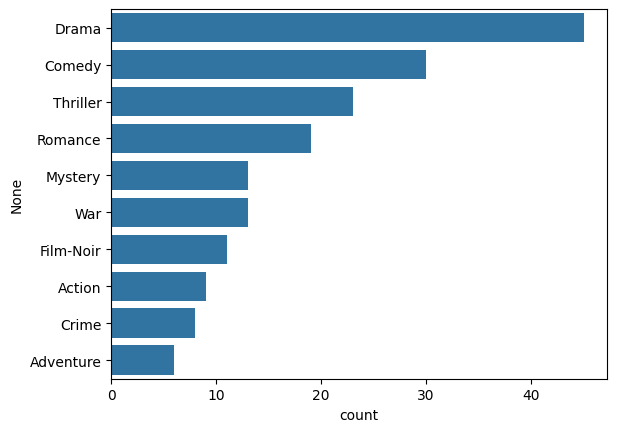

In [93]:
sns.barplot(x=female_genres_10, y=female_genres_10.index)
plt.show()

### explode 메서드

In [94]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [95]:
# movies 데이터프레임에 genre 파생변수를 추가
movies['genre'] = movies.genres.str.split('|')
movies

,movie_id,title,genres,genre
0,1,Toy Story (1995),Animation|Children's|Comedy,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,[Comedy]
3879,3949,Requiem for a Dream (2000),Drama,[Drama]
3880,3950,Tigerland (2000),Drama,[Drama]
3881,3951,Two Family House (2000),Drama,[Drama]


In [96]:
# movies 데이터프레임에서 genres 컬럼을 제거
movies.pop('genres')  # pop() 메서드: 데이터프레임에서 컬럼을 삭제하고, 삭제한 컬럼을 리턴.

,genres
0,Animation|Children's|Comedy
1,Adventure|Children's|Fantasy
2,Comedy|Romance
3,Comedy|Drama
4,Comedy
...,...
3878,Comedy
3879,Drama
3880,Drama
3881,Drama


In [97]:
movies

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy]
3879,3949,Requiem for a Dream (2000),[Drama]
3880,3950,Tigerland (2000),[Drama]
3881,3951,Two Family House (2000),[Drama]


In [98]:
# explode() 메서드: 컬럼이 가지고 있는 리스트의 값들을 하나씩 행(row)으로 만듦.
movies_explode = movies.explode('genre')

In [99]:
movies_explode

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
...,...,...,...
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama


In [101]:
movies_explode[movies_explode.title.isin(female_top100)]

,movie_id,title,genre
49,50,"Usual Suspects, The (1995)",Crime
49,50,"Usual Suspects, The (1995)",Thriller
243,246,Hoop Dreams (1994),Documentary
257,260,Star Wars: Episode IV - A New Hope (1977),Action
257,260,Star Wars: Episode IV - A New Hope (1977),Adventure
...,...,...,...
3366,3435,Double Indemnity (1944),Crime
3366,3435,Double Indemnity (1944),Film-Noir
3720,3789,"Pawnbroker, The (1965)",Drama
3732,3801,Anatomy of a Murder (1959),Drama


In [103]:
movies_explode[movies_explode.title.isin(female_top100)].genre.value_counts()

,count
genre,
Drama,45
Comedy,30
Thriller,23
Romance,19
Mystery,13
War,13
Film-Noir,11
Action,9
Crime,8


### 남성 별점 평균 상위 100개 영화들의 장르

In [108]:
# 남성 별점 평균 상위 100개의 영화 제목들
male_top100 = by_title_gender.sort_values(by='M', ascending=False).head(n=100).index

In [109]:
male_top100_movies = movies_explode[movies_explode.title.isin(male_top100)]

In [110]:
male_top100_movies

,movie_id,title,genre
49,50,"Usual Suspects, The (1995)",Crime
49,50,"Usual Suspects, The (1995)",Thriller
108,110,Braveheart (1995),Action
108,110,Braveheart (1995),Drama
108,110,Braveheart (1995),War
...,...,...,...
3614,3683,Blood Simple (1984),Film-Noir
3661,3730,"Conversation, The (1974)",Drama
3661,3730,"Conversation, The (1974)",Mystery
3827,3897,Almost Famous (2000),Comedy


In [111]:
male_top100_movies.genre.value_counts()

,count
genre,
Drama,51
Comedy,22
War,21
Thriller,19
Crime,14
Film-Noir,14
Action,13
Mystery,9
Adventure,8


In [112]:
male_genres_10 = male_top100_movies.genre.value_counts().head(n=10)
male_genres_10

,count
genre,
Drama,51
Comedy,22
War,21
Thriller,19
Crime,14
Film-Noir,14
Action,13
Mystery,9
Adventure,8


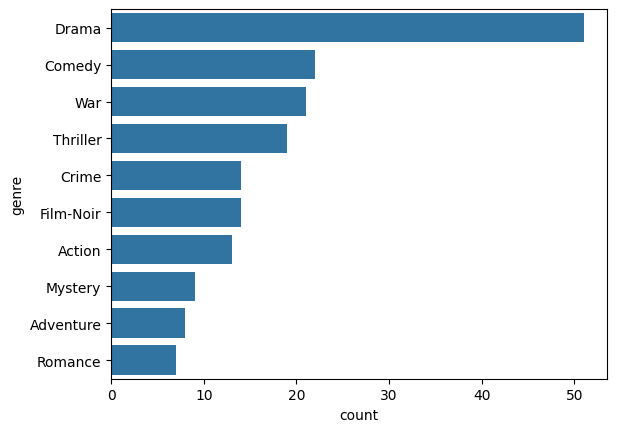

In [113]:
sns.barplot(x=male_genres_10, y=male_genres_10.index)
plt.show()

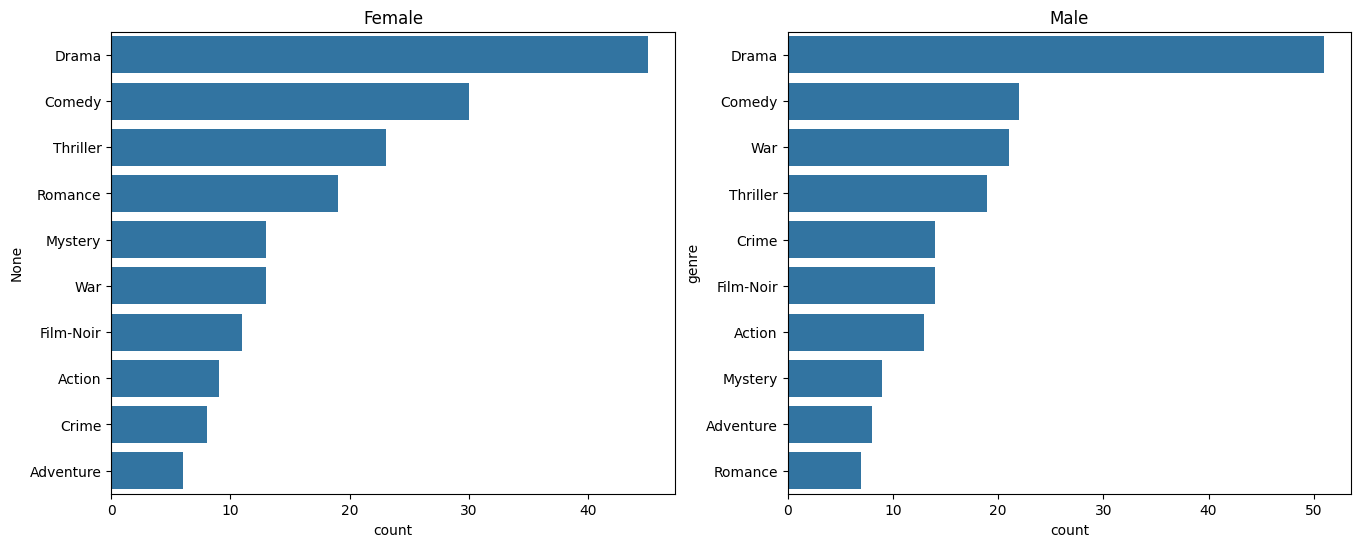

In [120]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.barplot(x=female_genres_10, y=female_genres_10.index, ax=axes[0])
sns.barplot(x=male_genres_10, y=male_genres_10.index, ax=axes[1])

axes[0].set_title('Female')
axes[1].set_title('Male')

plt.show()